In [1]:
import numpy as np


In [2]:
x=np.load("Without_jacket.npy")
    
x2=np.load('With_jacket.npy')

In [3]:
#new without__jacket
new_wo_j=[[None]*160000]*27
new_w_j=[[None]*160000]*27

def convert(source,dest,label):
    #tmp placeholder
    co= [[None]*400]*200
    cross= [[None]*400]*200

    for i in range(len(source)):
        x_1=source[i][:200000]
        x_2=source[i][200000:400000]
        x_1=x_1.reshape(200,1000)
        x_2=x_2.reshape(200,1000)

    #     converts (200,1000-)->(200,1024)
        for j in range(200):
            fft_result_co=np.abs(np.fft.fft(x_1[j],1024))
            fft_result_cross=np.abs(np.fft.fft(x_2[j],1024))
            first200 = fft_result_co[:200]
            last200=fft_result_co[824:]
            co[j]=np.concatenate([first200,last200])
            first200 = fft_result_cross[:200]
            last200=fft_result_cross[824:]
            cross[j]=np.concatenate([first200,last200])

    #     at this point tmp placeholders have trimmed fft data
    #     print np.array(co).shape
    #     print np.array(cross).shape
       
    
        co=np.array(co).reshape(80000,)
        cross=np.array(cross).reshape(80000,)
        dest[i]=list(co)+list(cross)+[label]
    #     print co.shape
    #     print cross.shape
        co= [[None]*400]*200
        cross= [[None]*400]*200
    
convert(x,new_wo_j,0)
convert(x2,new_w_j,1)



    
        
        
        

In [4]:
print np.array(new_wo_j).shape
print np.array(new_w_j).shape

(27, 160001)
(27, 160001)


In [19]:
x = new_wo_j+new_w_j
print np.array(x).shape
shuffle(x)
print np.array(x)[:,-1]
print np.array(x).shape
np.save('alldata_new.npy',np.array(x))

(54, 160001)
[ 0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.
  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
(54, 160001)


In [85]:
#concatenating with jacket and without jacket. shuffling

In [16]:
# print np.array(new_wo_j+new_w_j).shape
from random import shuffle
# # alldata=new_wo_j+new_w_j
# # shuffle(alldata)
# print np.array(new_wo_j+new_w_j).shape
# print new_wo_j+new_w_j[:1]
# x = np.load('alldata.npy')
# print x[5]

In [6]:
np.save('alldata.npy',np.array(new_wo_j+new_w_j))

In [86]:
#saving as CSV file

In [87]:
import pandas as pd
df= pd.DataFrame(alldata)
df.to_csv('alldata_new.csv')

In [89]:
#training script


In [ ]:
###########################
#loading libs

from keras import optimizers
from keras.models import Sequential
from keras.layers import TimeDistributed,Dense, Dropout, Activation,LSTM,Bidirectional,GaussianNoise
from keras.optimizers import SGD
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing import sequence
#uncomment these if you get tensorflow warnings
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
from keras.callbacks import TensorBoard
from time import time
import scipy.io as sio
from keras.regularizers import l2
from keras import regularizers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [ ]:
x1=np.load('home/hammad/data/alldata.npy')
train = x1[:,:160000]
trainy = x1[:,-1]

print trainy[:10]

test = train[-16:,:]
testy = trainy[-16:,:]

train=train[:-16]
trainy=trainy[:-16]

trainy = to_categorical(trainy, num_classes = 2)
testy = to_categorical(testy, num_classes = 2)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

train = np.array(train)
test = np.array(test)
print 'train',train.shape
print 'trainy',trainy.shape
print 'test',test.shape
print 'testy',testy.shape


print 'train'
for i in range(10):
	print train[i]
print 'test'
for i in range(10):
	print test[i]


In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=600000))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2,W_regularizer=l2(0.01)))

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# model.compile(loss='hinge',
#               optimizer='adadelta',
#               metrics=['accuracy'])


hist=model.fit(train,trainy,verbose = 1,validation_split=0.3,epochs=50,callbacks=[tensorboard])

score = model.evaluate(test, testy)
model.save("vestdetect_model")
print score

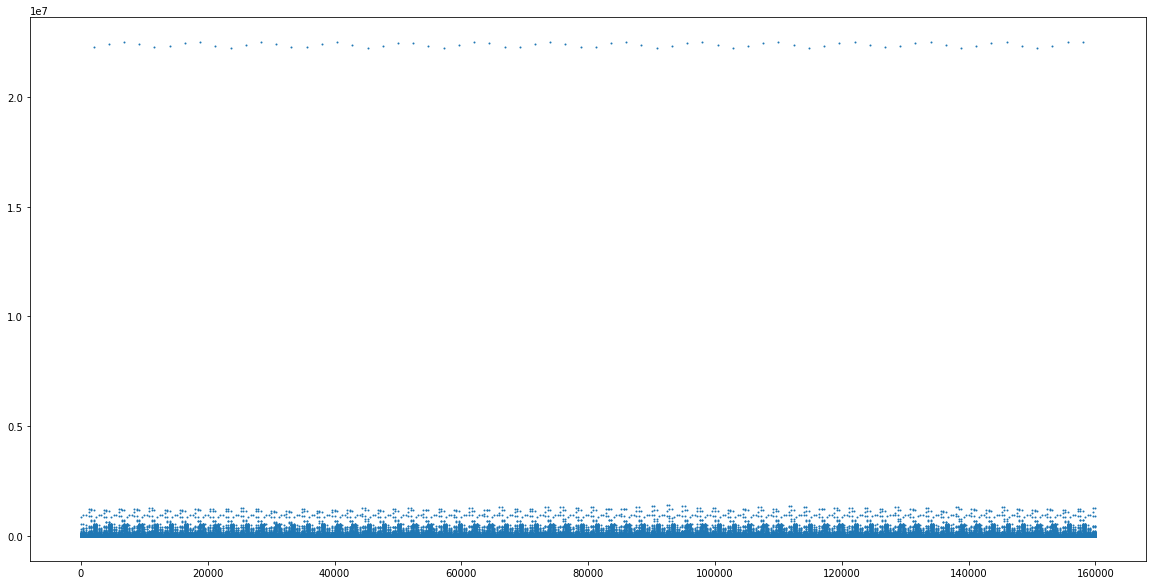

In [74]:
plt.scatter([i for i in range(160000)],new_w_j[0],s=1)
plt.show()

In [4]:
print x.shape

(27, 600001)


In [8]:
x_1=x[0][:200000]
x_2=x[0][200000:400000]

x_1=x_1.reshape(200,1000)
x_2=x_2.reshape(200,1000)
print x_1.shape
print x_2.shape



(200, 1000)
(200, 1000)


In [20]:
plt.scatter([i for i in range(1024)],np.abs(np.fft.fft(x_1[0],1024)),s=10)
plt.show()

NameError: name 'plt' is not defined

In [9]:
import matplotlib.pyplot as plt
import scipy.fftpack

In [69]:
y= [[None]*1024]*27
y2=[[None]*1024]*27
print np.array(y).shape
print np.array(y2).shape

(27, 1024)
(27, 1024)


In [172]:
for i in range(27):
    y[i]= np.abs(np.fft.fft(x[i],1024))
    y2[i]= np.abs(np.fft.fft(x2[i],1024))
print y[i].shape
print y2[i].shape

(1024,)
(1024,)


In [10]:
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [20, 10]


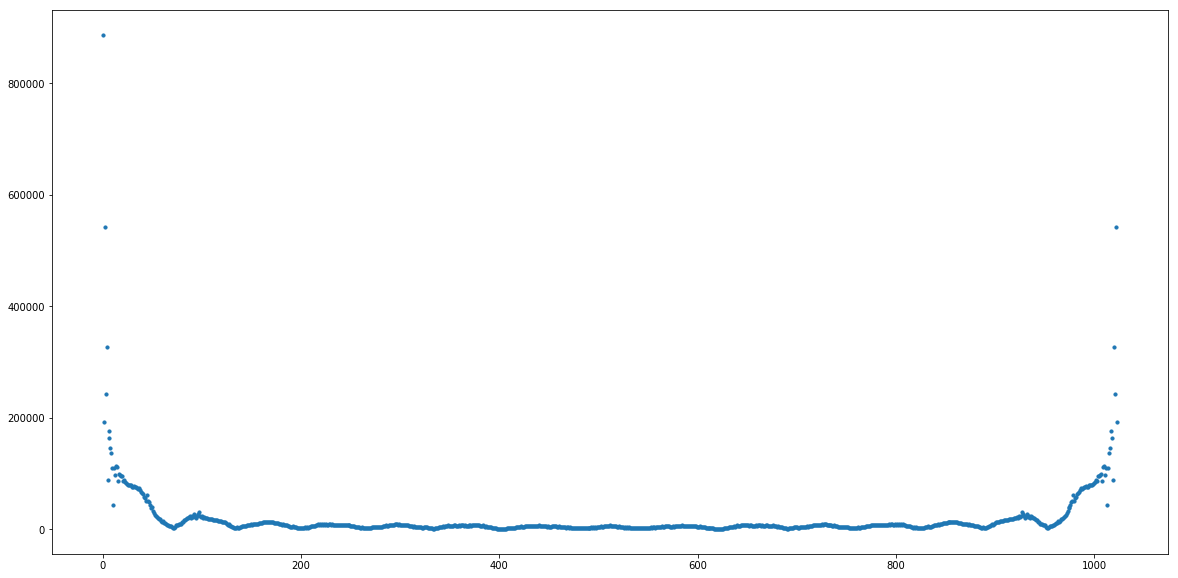

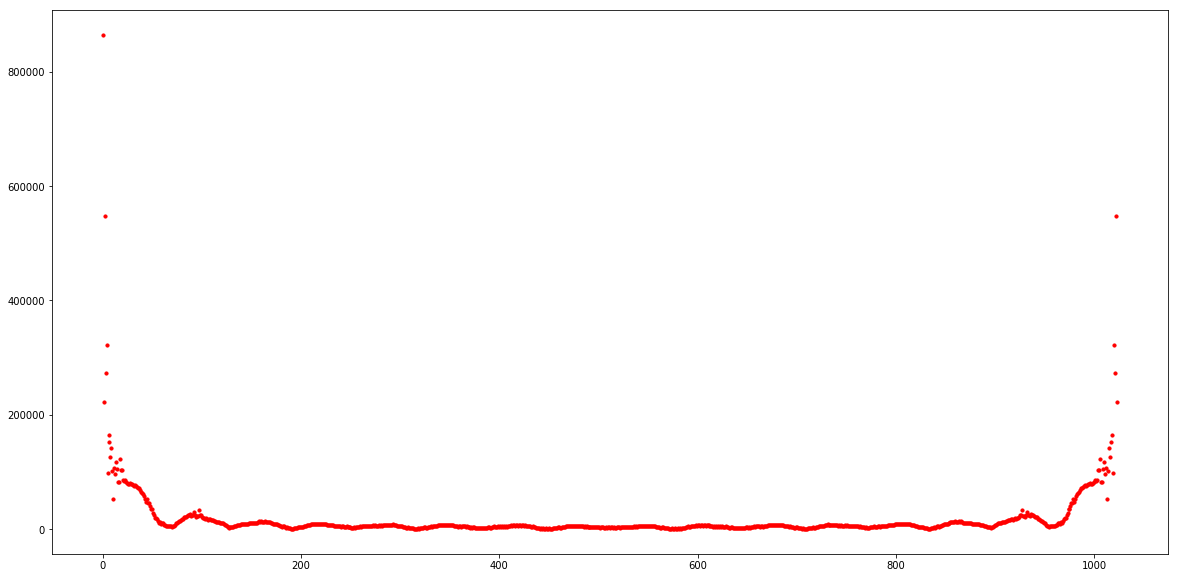

In [173]:
plt.scatter([i for i in range(1024)],y[0],s=10)
plt.show()
plt.scatter([i for i in range(1024)],y2[0],s=10,c='red')
plt.show()


In [ ]:
#creating placeholders

In [174]:
new_without_jacket_data=[[None]*400]*27
print 'without',np.array(new_without_jacket_data).shape
new_with_jacket_data=[[None]*401]*27
print 'with',np.array(new_with_jacket_data).shape

without (27, 400)
with (27, 401)


In [ ]:
#trimming

In [175]:
temp = np.array(y)[:,:200]
last200=np.array(y)[:,824:]
for i in range(27):
    #print i.shape
    new_without_jacket_data[i]=np.concatenate([temp[i],last200[i],[0]])
#print new_without_jacket_data[0]    
new_without_jacket_data= np.array(new_without_jacket_data)
print new_without_jacket_data.shape




(27, 401)


In [176]:
temp = np.array(y2)[:,:200]
last200=np.array(y2)[:,824:]
for i in range(27):
    #print i.shape
    new_with_jacket_data[i]=np.concatenate([temp[i],last200[i],[1]])
    
new_with_jacket_data= np.array(new_with_jacket_data)
print new_with_jacket_data.shape


(27, 401)


In [155]:
#concatinating and shuffling
type(new_without_jacket_data)

numpy.ndarray

In [3]:
#alldata=np.concatenate([new_with_jacket_data,new_without_jacket_data])
#print alldata.shape
#np.random.shuffle(alldata)
#print alldata[0]

In [165]:
array =np.asarray(alldata)
np.savetxt('alldata.csv',array,delimiter=',')

In [178]:
import pandas as pd 
df = pd.DataFrame(alldata)
df.to_csv("alldata.csv")

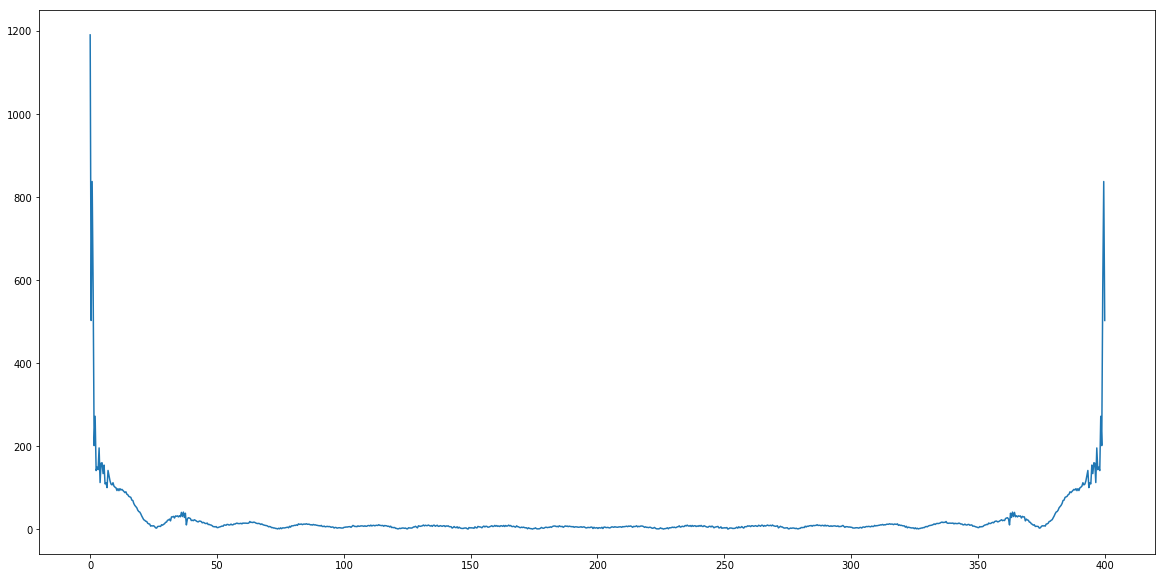

In [163]:

N = 1024

# sample spacing
T = 1.0 / 800.0


xf = np.linspace(0.0, 1.0/(2.0*T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(y[9][:N]))
plt.show()

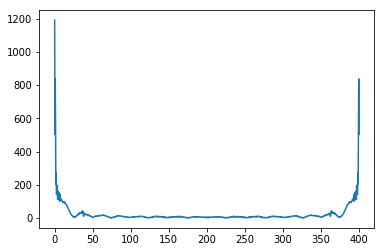

In [98]:
N = 1024

# sample spacing
T = 1.0 / 800.0


xf = np.linspace(0.0, 1.0/(2.0*T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(y[9][:N]))
# plt.figure(figsize=(40,10))
plt.show()

In [56]:
plt.plot(y[0], sp.real,y[0], sp.imag)


In [83]:
plt.show()

RAW TIME DOMAIN DATA


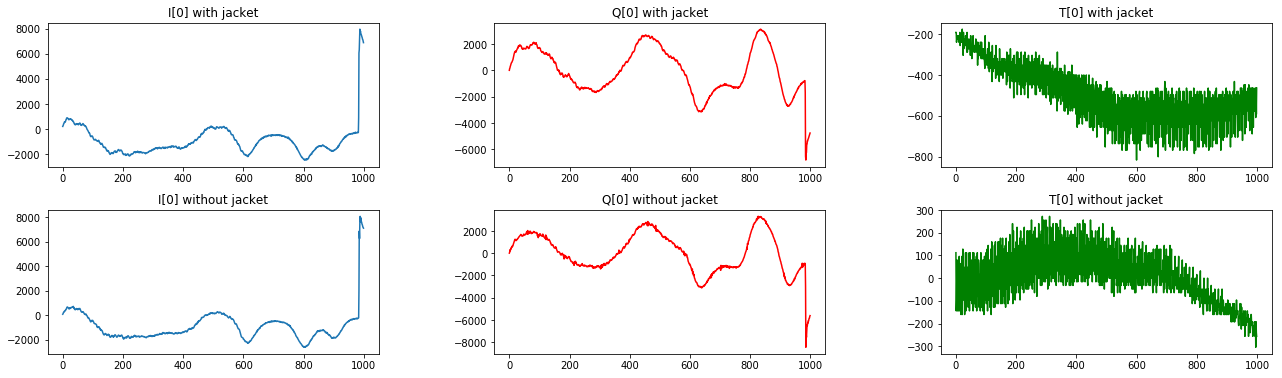

AFTER AVERAGING


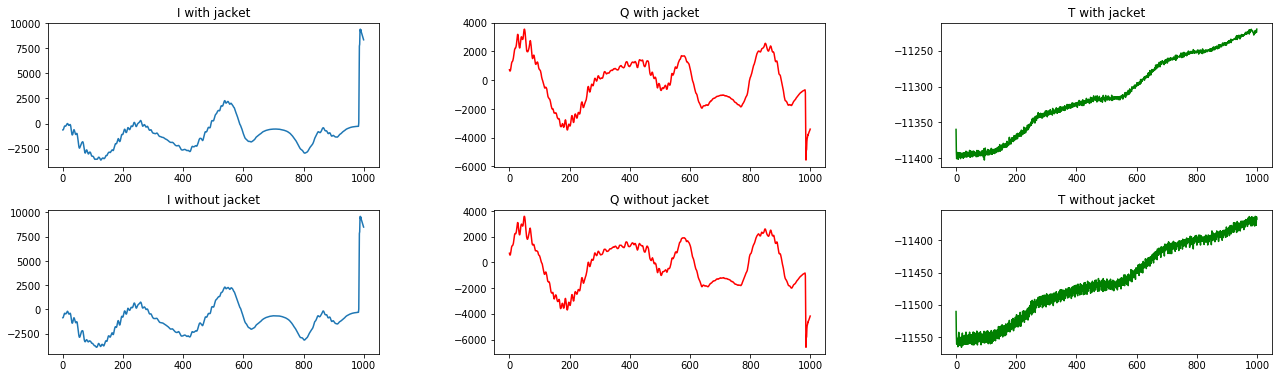

AFTER SUBTRACTING


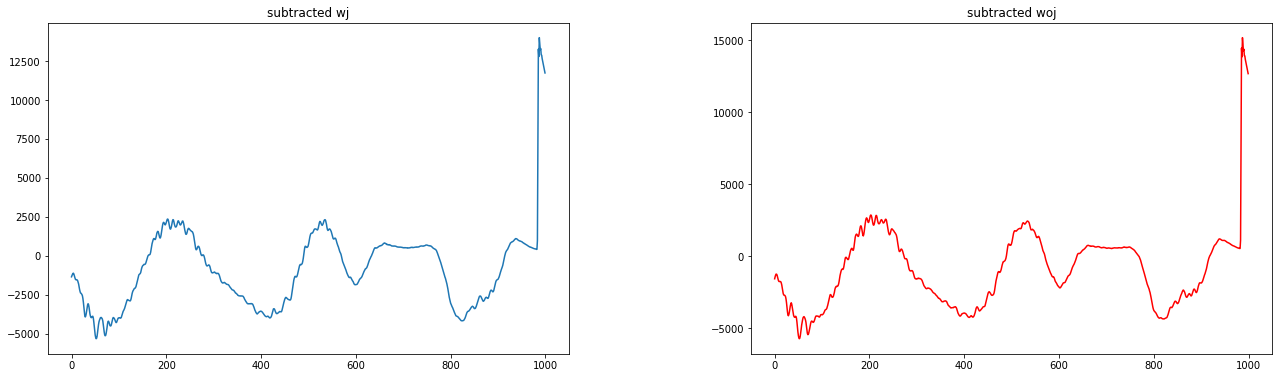

AFTER FFT


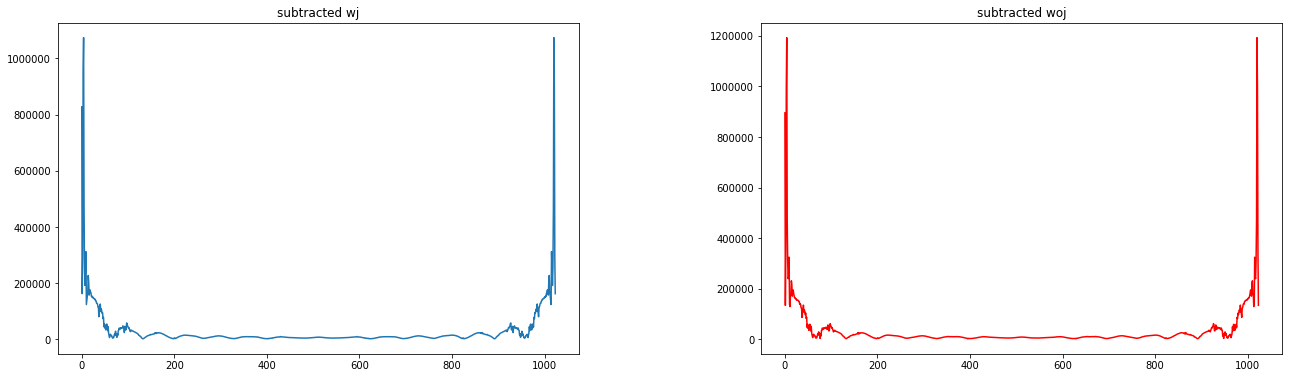

In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

i = 'hassan'
path= '/home/t-rex/Desktop/FYP/All39Files/'

ifile_wj=path+i+'_wj/I.mat'
qfile_wj=path+i+'_wj/Q.mat'
tfile_wj=path+i+'_wj/T.mat'

ifile_woj=path+i+'_woj/I.mat'
qfile_woj=path+i+'_woj/Q.mat'
tfile_woj=path+i+'_woj/T.mat'

I_wj= sio.loadmat(ifile_wj)
Q_wj= sio.loadmat(qfile_wj)
T_wj= sio.loadmat(tfile_wj)

I_woj= sio.loadmat(ifile_woj)
Q_woj= sio.loadmat(qfile_woj)
T_woj= sio.loadmat(tfile_woj)

I_wj=I_wj['DataI']
Q_wj=Q_wj['DataQ']
T_wj=T_wj['DataT']

I_woj=I_woj['DataI']
Q_woj=Q_woj['DataQ']
T_woj=T_woj['DataT']


print 'RAW TIME DOMAIN DATA' 
plt.figure(figsize=(20,5))
plt.subplot(231)
plt.plot([i for i in range(1000)],I_wj[0])
plt.title('I[0] with jacket')
plt.subplot(232)
plt.plot([i for i in range(1000)],Q_wj[0],color='r')
plt.title('Q[0] with jacket')
plt.subplot(233)
plt.plot([i for i in range(1000)],T_wj[0],color='g')
plt.title('T[0] with jacket')


plt.subplot(234)
plt.plot([i for i in range(1000)],I_woj[0])
plt.title('I[0] without jacket')
plt.subplot(235)
plt.plot([i for i in range(1000)],Q_woj[0],color='r')
plt.title('Q[0] without jacket')
plt.subplot(236)
plt.plot([i for i in range(1000)],T_woj[0],color='g')
plt.title('T[0] without jacket')

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()

print 'AFTER AVERAGING'
averagedI=np.mean(I_wj,axis=0)
averagedQ=np.mean(Q_wj,axis=0)
averagedT=np.mean(T_wj,axis=0)

averagedI_woj=np.mean(I_woj,axis=0)
averagedQ_woj=np.mean(Q_woj,axis=0)
averagedT_woj=np.mean(T_woj,axis=0)


plt.figure(figsize=(20,5))
plt.subplot(231)
plt.plot([i for i in range(1000)],averagedI)
plt.title('I with jacket')
plt.subplot(232)
plt.plot([i for i in range(1000)],averagedQ,color='r')
plt.title('Q with jacket')
plt.subplot(233)
plt.plot([i for i in range(1000)],averagedT,color='g')
plt.title('T with jacket')


plt.subplot(234)
plt.plot([i for i in range(1000)],averagedI_woj)
plt.title('I without jacket')
plt.subplot(235)
plt.plot([i for i in range(1000)],averagedQ_woj,color='r')
plt.title('Q without jacket')
plt.subplot(236)
plt.plot([i for i in range(1000)],averagedT_woj,color='g')
plt.title('T without jacket')

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()

print "AFTER SUBTRACTING"
subtracted=np.subtract(averagedI,averagedQ)
subtracted_woj=np.subtract(averagedI_woj,averagedQ_woj)
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot([i for i in range(1000)],subtracted)
plt.title('subtracted wj')
plt.subplot(122)
plt.plot([i for i in range(1000)],subtracted_woj,color='r')
plt.title('subtracted woj')
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()

print "AFTER FFT"
fft=np.abs(np.fft.fft(subtracted,1024))
fft_woj=np.abs(np.fft.fft(subtracted_woj,1024))
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot([i for i in range(1024)],fft)
plt.title('subtracted wj')
plt.subplot(122)
plt.plot([i for i in range(1024)],fft_woj,color='r')
plt.title('subtracted woj')
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
plt.show()


17th feb


In [ ]:
#reads .mat files, averages, calculates ratio and saves as .csv for weka
import scipy.io as sio
import numpy
Subjects = ['hassan','adeel1','Ameen1','amjad1','Arqam1','Asif1',\
            'Azaman1','bhatti1','faheem1','furkan1','george1','gohas1'\
            ,'grizwan1','hassan1','kashif1','naseem1','naveed1','peter1'\
            ,'rafiq1','rizwan1','sajjad1','sakim1','tariq1','umer1',\
            'usman1','waqas1','waqash1']
path= '/home/t-rex/Desktop/FYP/All39Files/'
wj=0
data =numpy.zeros(shape=(54,1025))
label =numpy.zeros(shape=(55,1))

#data[0,:]=[i for i in range(1001)]
#data[0,-1]=5555
counter=0
for wj in [0,1]:


    for i in Subjects:
        if wj:
            ifile=path+i+'_wj/I.mat'
            qfile=path+i+'_wj/Q.mat'
        else:
            ifile=path+i+'_woj/I.mat'
            qfile=path+i+'_woj/Q.mat'
        I= sio.loadmat(ifile)
        Q= sio.loadmat(qfile)
        
        I=I['DataI']
        Q=Q['DataQ']

        print 'counter value=',counter
        print 'I',I.shape 
        print 'Q',Q.shape 

        averagedI=np.mean(I,axis=0)
        averagedQ=np.mean(Q,axis=0)
       
        print 'after averaging' 
        print 'I',averagedI.shape 
        print 'Q',averagedQ.shape 
        
#       fft_I=np.abs(np.fft.fft(averagedI,1024))
#       fft_q=np.abs(np.fft.fft(averagedQ,1024))
        
        subtracted=np.subtract(averagedI,averagedQ)
        #subtracted=np.subtract(fft_I,fft_q)
        
        subtracted=np.abs(np.fft.fft(subtracted,1024))
        
        print 'after subtracting'
        print 'subtracted',subtracted.shape 
        data[counter,:-1]=subtracted
        
        if wj:
            label[counter]=1
            data[counter,-1]=1
        else:
            label[counter]=0
            data[counter,-1]=0
        counter+=1

        #end of loop

print 'total data size',data.shape
print 'total label size',label.shape

np.random.shuffle(data)
data[0,:]=[i for i in range(1025)]
data[0,-1]=5555

numpy.savetxt("averaged_ratio_fft.csv",data, delimiter=",")


In [32]:
print data[0]

[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   9.98000000e+02
   9.99000000e+02   5.55500000e+03]


# time domain data 

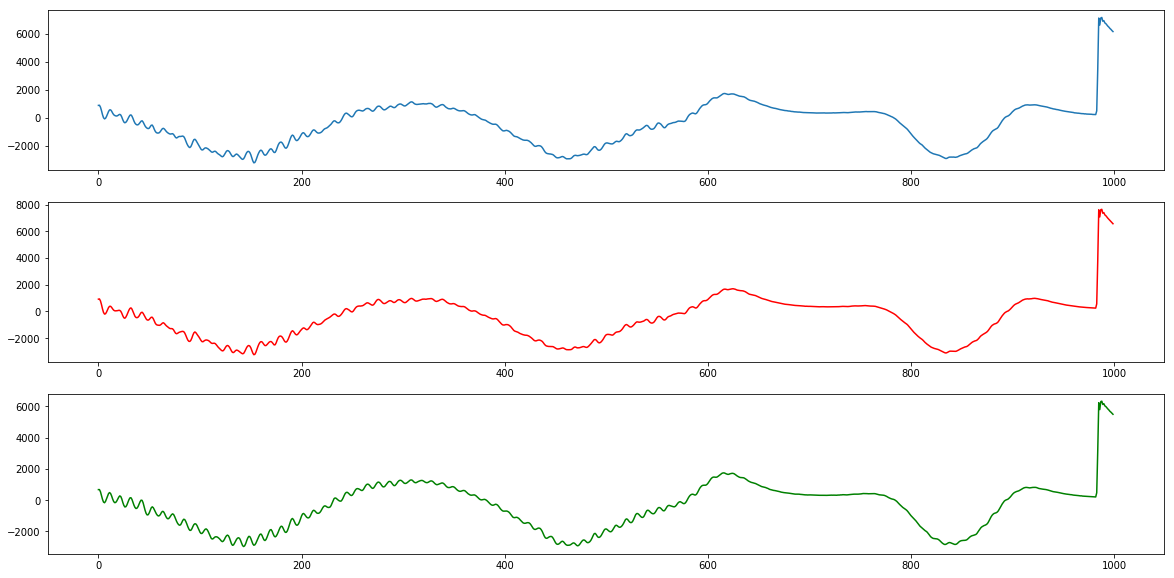

In [61]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot([i for i in range(1000)], data[1,:-1])
#plt.axis([0, 6, 0, 20])
plt.subplot(312)
plt.plot([i for i in range(1000)], data[2,:-1],color='r')
plt.subplot(313)
plt.plot([i for i in range(1000)], data[3,:-1],color='g')
plt.show()

# freq domain (fft before ratio)

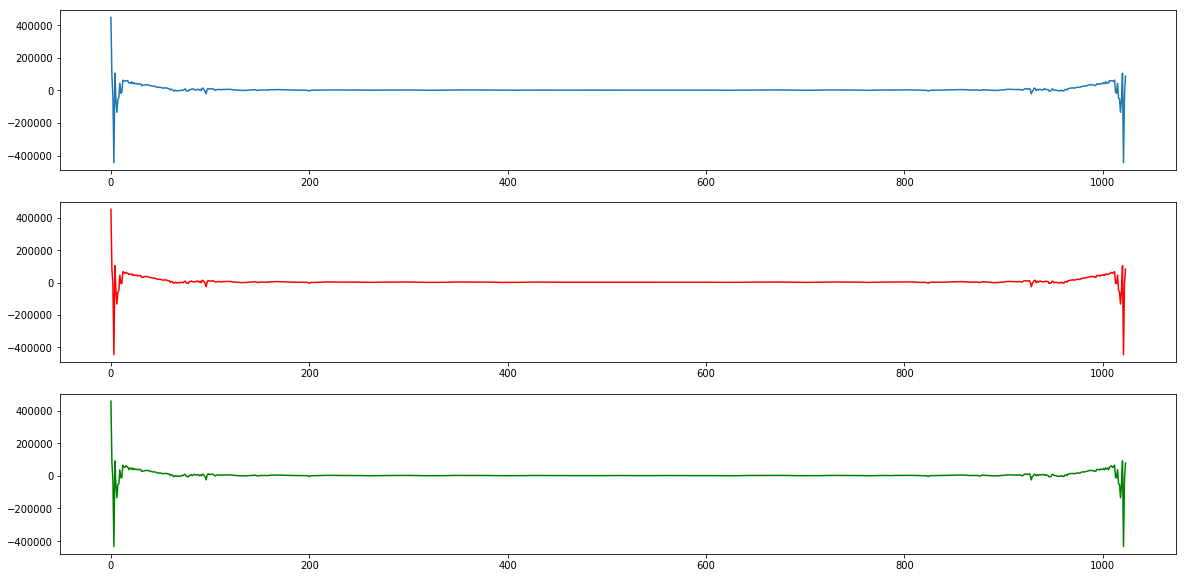

In [64]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot([i for i in range(1024)], data[1,:-1])
#plt.axis([0, 6, 0, 20])
plt.subplot(312)
plt.plot([i for i in range(1024)], data[2,:-1],color='r')
plt.subplot(313)
plt.plot([i for i in range(1024)], data[3,:-1],color='g')
plt.show()

# freq domain (fft after ratio)

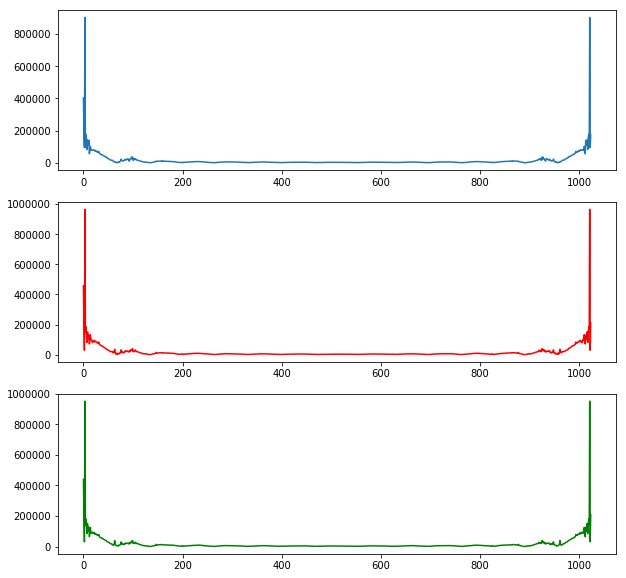

In [67]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot([i for i in range(1024)], data[1,:-1])
#plt.axis([0, 6, 0, 20])
plt.subplot(312)
plt.plot([i for i in range(1024)], data[2,:-1],color='r')
plt.subplot(313)
plt.plot([i for i in range(1024)], data[3,:-1],color='g')
plt.show()




FOR HASSAN WJ I & Q (SIZE is 100x1000) 


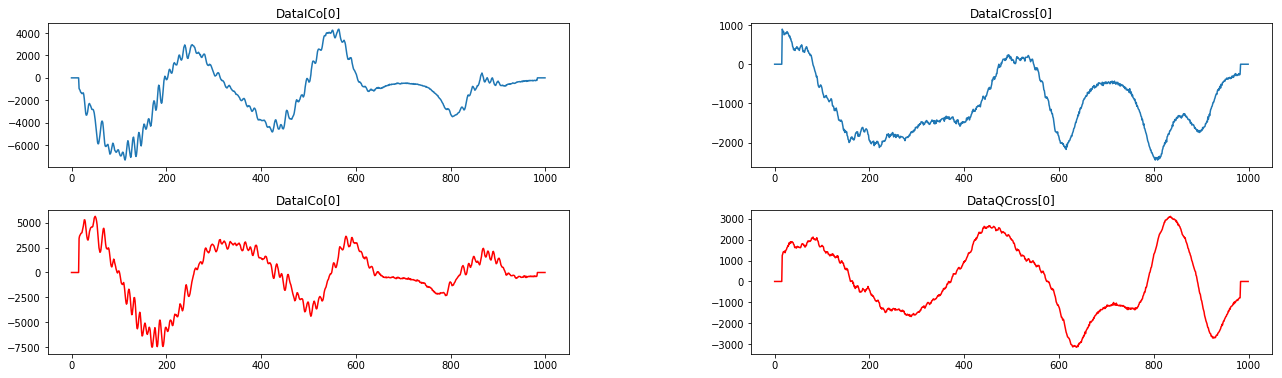

In [11]:
import scipy.io as sio
import numpy

path = '/media/t-rex/F/fypp/FYP/All39Files/';
ICopath = path + 'hassan_wj/ICo.mat'
ICrosspath = path + 'hassan_wj/ICross.mat'
QCopath = path + 'hassan_wj/QCo.mat'
QCrosspath = path + 'hassan_wj/QCross.mat'

DataICo= sio.loadmat(ICopath)
DataICross= sio.loadmat(ICrosspath)
DataQCo= sio.loadmat(QCopath)
DataQCross= sio.loadmat(QCrosspath)

DataICo= DataICo['DataICo']
DataICross= DataICross['DataICross']
DataQCo= DataQCo['DataQCo']
DataQCross= DataQCross['DataQCross']

# print DataICo.size
# print DataICross.size
# print DataQCo.size
# print DataQCross.size
import matplotlib.pyplot as plt
print "\n\n"
print "FOR HASSAN WJ I & Q (SIZE is 100x1000) "

plt.figure(figsize=(20,5))
plt.subplot(221)
plt.plot([i for i in range(1000)],DataICo[0])
plt.title('DataICo[0]')
plt.subplot(222)
plt.plot([i for i in range(1000)],DataICross[0])
plt.title('DataICross[0]')
plt.subplot(223)
plt.plot([i for i in range(1000)],DataQCo[0],'r')
plt.title('DataICo[0]')
plt.subplot(224)
plt.plot([i for i in range(1000)],DataQCross[0],'r')
plt.title('DataQCross[0]')

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)


# questions
1) We have Co & Cross for both I and Q feats. why? (total feature arrays 2->4)<br><br>
2) Each Co & Cross has dimension 100x1000,I_Co -> 100x1000, I_cross -> 100x1000, Q_Co -> 100x1000, Q_Cross -> 100x1000<br><br>
3) This brings total trainable dimensions to 
(2)x(27)x(4)x(100x1000) -> (wj/woj)x(totalSubjects)x(Co&Cross for I&Q)x(100x1000)<br>

WITH OUT JACKET
Data I


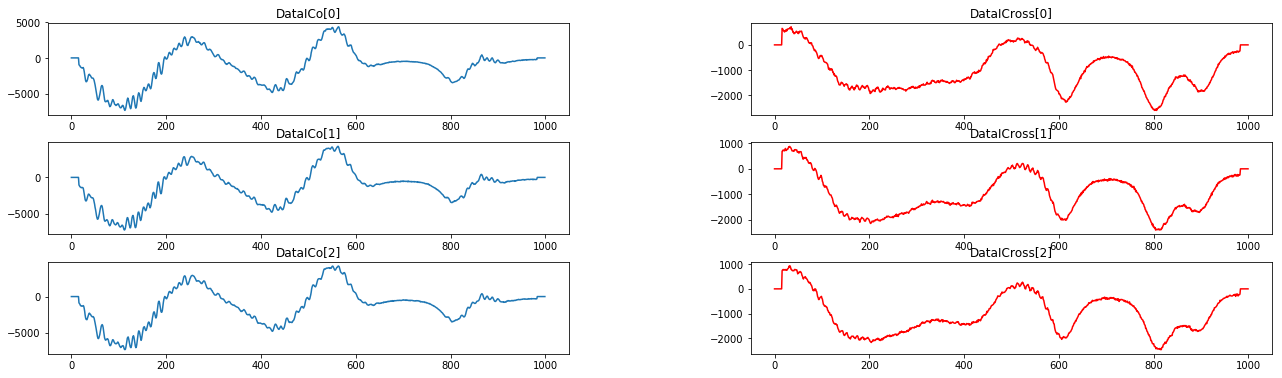

Data Q


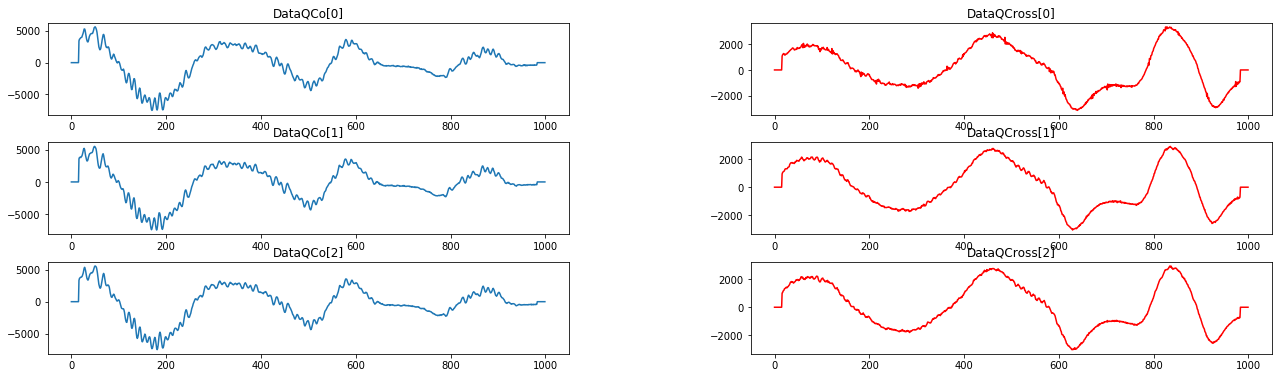

AFTER AVERAGING


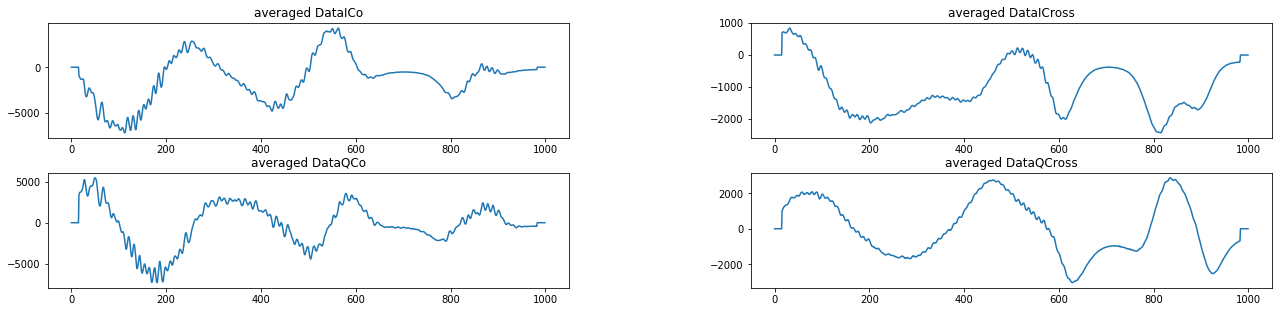

FFT


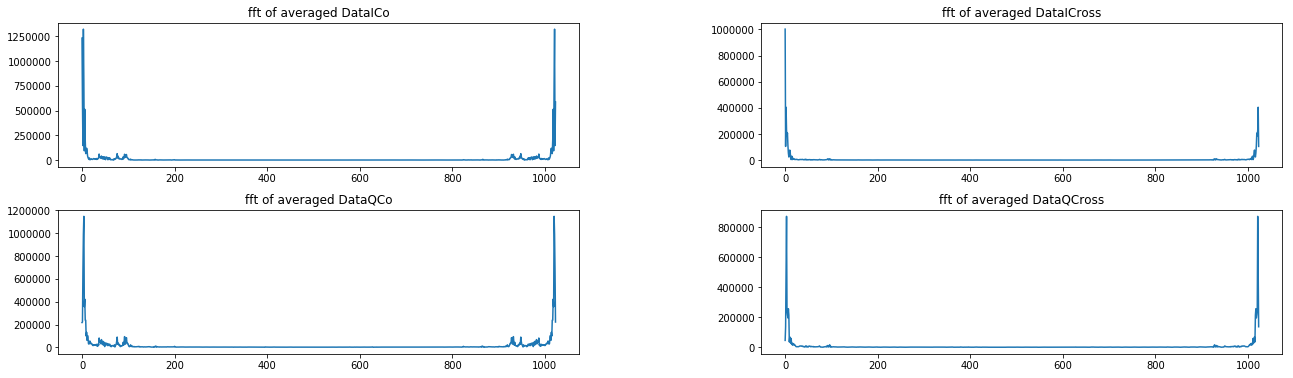

WITH JACKET
Data I


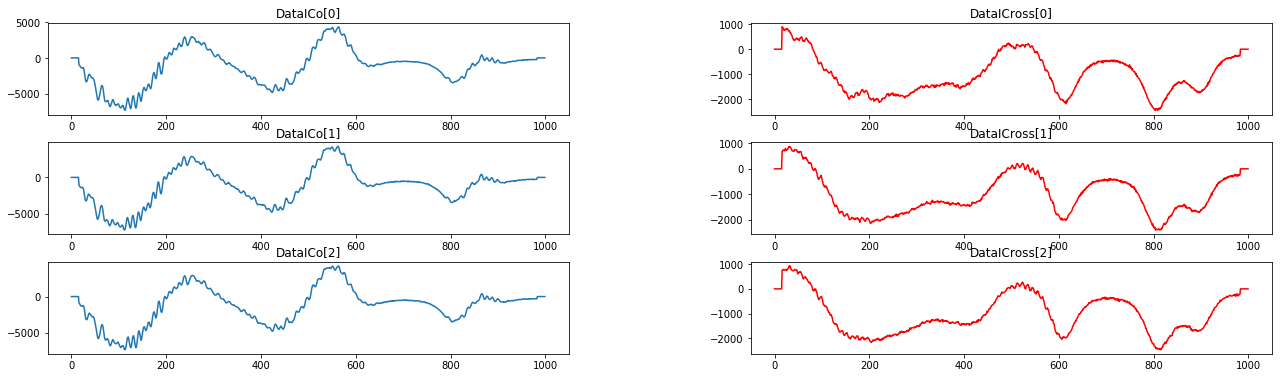

Data Q


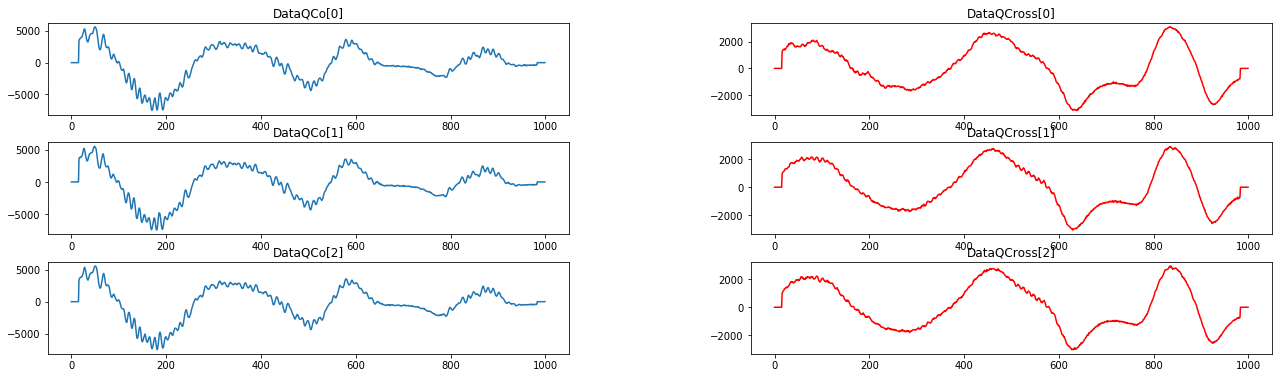

AFTER AVERAGING


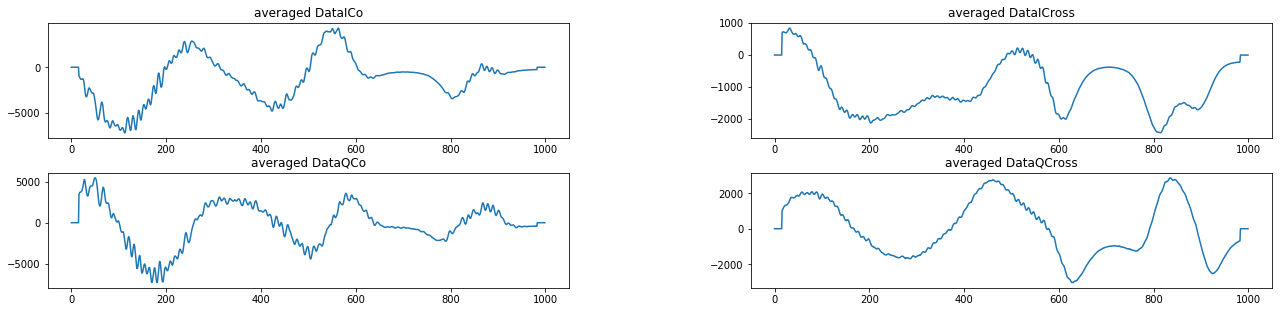

FFT


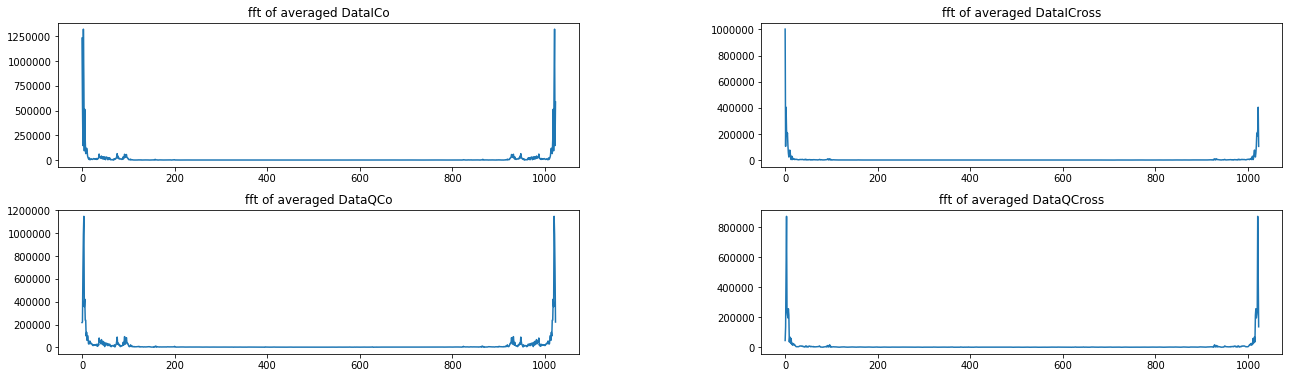

In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

#Subjects = ['hassan','adeel1','Ameen1','amjad1','Arqam1','Asif1',\
#             'Azaman1','bhatti1','faheem1','furkan1','george1','gohas1'\
#             ,'grizwan1','hassan1','kashif1','naseem1','naveed1','peter1'\
#             ,'rafiq1','rizwan1','sajjad1','sakim1','tariq1','umer1',\
#             'usman1','waqas1','waqash1']
Subjects=['hassan']
path= '/media/t-rex/F/fypp/FYP/All39Files/'
wj=0
for subject in Subjects:
   
    ICopath = path + subject +'_woj/ICo.mat'
    ICrosspath = path + subject +'_woj/ICross.mat'
    QCopath = path + subject +'_woj/QCo.mat'
    QCrosspath = path + subject +'_woj/QCross.mat'
        
    print 'WITH OUT JACKET'    
    DataICo= sio.loadmat(ICopath)
    DataICross= sio.loadmat(ICrosspath)
    DataQCo= sio.loadmat(QCopath)
    DataQCross= sio.loadmat(QCrosspath)

    DataICo= DataICo['DataICo']
    DataICross= DataICross['DataICross']
    DataQCo= DataQCo['DataQCo']
    DataQCross= DataQCross['DataQCross']
    print 'Data I'
    
    ####
    plt.figure(figsize=(20,5))
    plt.subplot(321)
    plt.plot([i for i in range(1000)],DataICo[0])
    plt.title('DataICo[0]')
    plt.subplot(323)
    plt.plot([i for i in range(1000)],DataICo[1])
    plt.title('DataICo[1]')
    plt.subplot(325)
    plt.plot([i for i in range(1000)],DataICo[2])
    plt.title('DataICo[2]')
    
    plt.subplot(322)
    plt.plot([i for i in range(1000)],DataICross[0],'r')
    plt.title('DataICross[0]')
    plt.subplot(324)
    plt.plot([i for i in range(1000)],DataICross[1],'r')
    plt.title('DataICross[1]')
    plt.subplot(326)
    plt.plot([i for i in range(1000)],DataICross[2],'r')
    plt.title('DataICross[2]')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    ######
    
    print 'Data Q'
    ####
    plt.figure(figsize=(20,5))
    plt.subplot(321)
    plt.plot([i for i in range(1000)],DataQCo[0])
    plt.title('DataQCo[0]')
    plt.subplot(323)
    plt.plot([i for i in range(1000)],DataQCo[1])
    plt.title('DataQCo[1]')
    plt.subplot(325)
    plt.plot([i for i in range(1000)],DataQCo[2])
    plt.title('DataQCo[2]')
    
    plt.subplot(322)
    plt.plot([i for i in range(1000)],DataQCross[0],'r')
    plt.title('DataQCross[0]')
    plt.subplot(324)
   
    plt.plot([i for i in range(1000)],DataQCross[1],'r')
    plt.title('DataQCross[1]')
    plt.subplot(326)
    plt.plot([i for i in range(1000)],DataQCross[2],'r')
    plt.title('DataQCross[2]')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    ####
    
    print "AFTER AVERAGING"
    plt.figure(figsize=(20,4))
    avgDataICo = np.mean(DataICo,axis=0)
    avgDataICross = np.mean(DataICross,axis=0)
    avgDataQCo = np.mean(DataQCo,axis=0)
    avgDataQCross = np.mean(DataQCross,axis=0)
    #####
    plt.subplot(221)
    plt.plot([i for i in range(1000)],avgDataICo)
    plt.title('averaged DataICo')
    plt.subplot(222)
    plt.plot([i for i in range(1000)],avgDataICross)
    plt.title('averaged DataICross')
    
    plt.subplot(223)
    plt.plot([i for i in range(1000)],avgDataQCo)
    plt.title('averaged DataQCo')
    plt.subplot(224)
    plt.plot([i for i in range(1000)],avgDataQCross)
    plt.title('averaged DataQCross')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    ####
    
    fftAvgDataICo=np.abs(np.fft.fft(avgDataICo,1024))
    fftAvgDataICross=np.abs(np.fft.fft(avgDataICross,1024))
    fftAvgDataQCo=np.abs(np.fft.fft(avgDataQCo,1024))
    fftAvgDataQCross=np.abs(np.fft.fft(avgDataQCross,1024))
    ####
    print 'FFT'
    plt.subplot(221)
    plt.plot([i for i in range(1024)],fftAvgDataICo)
    plt.title('fft of averaged DataICo')
    plt.subplot(222)
    plt.plot([i for i in range(1024)],fftAvgDataICross)
    plt.title('fft of averaged DataICross')
    
    plt.subplot(223)
    plt.plot([i for i in range(1024)],fftAvgDataQCo)
    plt.title('fft of averaged DataQCo')
    plt.subplot(224)
    plt.plot([i for i in range(1024)],fftAvgDataQCross)
    plt.title('fft of averaged DataQCross')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    
    ##############################

    ICopath = path + subject +'_wj/ICo.mat'
    ICrosspath = path + subject +'_wj/ICross.mat'
    QCopath = path + subject +'_wj/QCo.mat'
    QCrosspath = path + subject +'_wj/QCross.mat'
    
    print 'WITH JACKET'   
    DataICo= sio.loadmat(ICopath)
    DataICross= sio.loadmat(ICrosspath)
    DataQCo= sio.loadmat(QCopath)
    DataQCross= sio.loadmat(QCrosspath)

    DataICo= DataICo['DataICo']
    DataICross= DataICross['DataICross']
    DataQCo= DataQCo['DataQCo']
    DataQCross= DataQCross['DataQCross']
    print 'Data I'
    plt.figure(figsize=(20,5))
    plt.subplot(321)
    plt.plot([i for i in range(1000)],DataICo[0])
    plt.title('DataICo[0]')
    plt.subplot(323)
    plt.plot([i for i in range(1000)],DataICo[1])
    plt.title('DataICo[1]')
    plt.subplot(325)
    plt.plot([i for i in range(1000)],DataICo[2])
    plt.title('DataICo[2]')
    
    plt.subplot(322)
    plt.plot([i for i in range(1000)],DataICross[0],'r')
    plt.title('DataICross[0]')
    plt.subplot(324)
    plt.plot([i for i in range(1000)],DataICross[1],'r')
    plt.title('DataICross[1]')
    plt.subplot(326)
    plt.plot([i for i in range(1000)],DataICross[2],'r')
    plt.title('DataICross[2]')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    
    print 'Data Q'
    
    plt.figure(figsize=(20,5))
    plt.subplot(321)
    plt.plot([i for i in range(1000)],DataQCo[0])
    plt.title('DataQCo[0]')
    plt.subplot(323)
    plt.plot([i for i in range(1000)],DataQCo[1])
    plt.title('DataQCo[1]')
    plt.subplot(325)
    plt.plot([i for i in range(1000)],DataQCo[2])
    plt.title('DataQCo[2]')
    
    plt.subplot(322)
    plt.plot([i for i in range(1000)],DataQCross[0],'r')
    plt.title('DataQCross[0]')
    plt.subplot(324)
   
    plt.plot([i for i in range(1000)],DataQCross[1],'r')
    plt.title('DataQCross[1]')
    plt.subplot(326)
    plt.plot([i for i in range(1000)],DataQCross[2],'r')
    plt.title('DataQCross[2]')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    
    
    print "AFTER AVERAGING"
    plt.figure(figsize=(20,4))
    avgDataICo = np.mean(DataICo,axis=0)
    avgDataICross = np.mean(DataICross,axis=0)
    avgDataQCo = np.mean(DataQCo,axis=0)
    avgDataQCross = np.mean(DataQCross,axis=0)
    
    plt.subplot(221)
    plt.plot([i for i in range(1000)],avgDataICo)
    plt.title('averaged DataICo')
    plt.subplot(222)
    plt.plot([i for i in range(1000)],avgDataICross)
    plt.title('averaged DataICross')
    
    plt.subplot(223)
    plt.plot([i for i in range(1000)],avgDataQCo)
    plt.title('averaged DataQCo')
    plt.subplot(224)
    plt.plot([i for i in range(1000)],avgDataQCross)
    plt.title('averaged DataQCross')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    
    print 'FFT'
    fftAvgDataICo=np.abs(np.fft.fft(avgDataICo,1024))
    fftAvgDataICross=np.abs(np.fft.fft(avgDataICross,1024))
    fftAvgDataQCo=np.abs(np.fft.fft(avgDataQCo,1024))
    fftAvgDataQCross=np.abs(np.fft.fft(avgDataQCross,1024))
    
    plt.subplot(221)
    plt.plot([i for i in range(1024)],fftAvgDataICo)
    plt.title('fft of averaged DataICo')
    plt.subplot(222)
    plt.plot([i for i in range(1024)],fftAvgDataICross)
    plt.title('fft of averaged DataICross')
    
    plt.subplot(223)
    plt.plot([i for i in range(1024)],fftAvgDataQCo)
    plt.title('fft of averaged DataQCo')
    plt.subplot(224)
    plt.plot([i for i in range(1024)],fftAvgDataQCross)
    plt.title('fft of averaged DataQCross')
    
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
                    wspace=0.35)
    plt.show()
    

# Averaged Time domain data

WITH JACKET
<img src="wj.png">
WITHOUT JACKET
<img src="woj.png">

# FFT of Averaged time domain data

WITH JACKET
<img src="wj_fft.png">
WITHOUT JACKET
<img src="woj_fft.png">

In [25]:
# DATASET GENERATOR

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

Subjects = ['hassan','adeel1','Ameen1','amjad1','Arqam1','Asif1',\
            'Azaman1','bhatti1','faheem1','furkan1','george1','gohas1'\
            ,'grizwan1','hassan1','kashif1','naseem1','naveed1','peter1'\
            ,'rafiq1','rizwan1','sajjad1','sakim1','tariq1','umer1',\
            'usman1','waqas1','waqash1']

path= '/media/t-rex/F/fypp/FYP/All39Files/'
counter=0
data = np.zeros(shape=(216,2001))

for subject in Subjects:
    #wj
    ICopath = path + subject +'_wj/ICo.mat'
    ICrosspath = path + subject +'_wj/ICross.mat'
    QCopath = path + subject +'_wj/QCo.mat'
    QCrosspath = path + subject +'_wj/QCross.mat'
    
    DataICo_wj= sio.loadmat(ICopath)
    DataICross_wj= sio.loadmat(ICrosspath)
    DataQCo_wj= sio.loadmat(QCopath)
    DataQCross_wj= sio.loadmat(QCrosspath)
    
    ICopath = path + subject +'_woj/ICo.mat'
    ICrosspath = path + subject +'_woj/ICross.mat'
    QCopath = path + subject +'_woj/QCo.mat'
    QCrosspath = path + subject +'_woj/QCross.mat'
    
    DataICo_woj= sio.loadmat(ICopath)
    DataICross_woj= sio.loadmat(ICrosspath)
    DataQCo_woj= sio.loadmat(QCopath)
    DataQCross_woj= sio.loadmat(QCrosspath)
    
    #wj and woj both loaded simultaneously
    DataICo_wj= DataICo_wj['DataICo']
    DataICross_wj= DataICross_wj['DataICross']
    DataQCo_wj= DataQCo_wj['DataQCo']
    DataQCross_wj= DataQCross_wj['DataQCross']

    DataICo_woj= DataICo_woj['DataICo']
    DataICross_woj= DataICross_woj['DataICross']
    DataQCo_woj= DataQCo_woj['DataQCo']
    DataQCross_woj= DataQCross_woj['DataQCross']
    
    #avg both wj and woj
    avgDataICo_wj = np.mean(DataICo_wj,axis=0)
    avgDataICross_wj = np.mean(DataICross_wj,axis=0)
    avgDataQCo_wj = np.mean(DataQCo_wj,axis=0)
    avgDataQCross_wj = np.mean(DataQCross_wj,axis=0)
    
    avgDataICo_woj = np.mean(DataICo_woj,axis=0)
    avgDataICross_woj = np.mean(DataICross_woj,axis=0)
    avgDataQCo_woj = np.mean(DataQCo_woj,axis=0)
    avgDataQCross_woj = np.mean(DataQCross_woj,axis=0)
#   ##########################  
#     #shuffling co & cross wj
#     shuffledco_co_wj = [None]*len(avgDataICo_wj)*2
#     c=0
#     for i in range(len(avgDataICo_wj)):
#         shuffledco_co_wj[c]=avgDataICo_wj[i]
#         shuffledco_co_wj[c+1]=avgDataQCo_wj[i]
#         c=c+2
#     c=0
#     shuffledcross_cross_wj = [None]*len(avgDataICross_wj)*2
#     for i in range(len(avgDataICross_wj)):
#         shuffledcross_cross_wj[c]=avgDataICross_wj[i]
#         shuffledcross_cross_wj[c+1]=avgDataQCross_wj[i]
#         c=c+2
    
#     #shuffling co & cross woj
#     shuffledco_co_woj = [None]*len(avgDataICo_woj)*2
#     c=0
#     for i in range(len(avgDataICo_woj)):
#         shuffledco_co_woj[c]=avgDataICo_woj[i]
#         shuffledco_co_woj[c+1]=avgDataQCo_woj[i]
#         c=c+2
#     c=0
#     shuffledcross_cross_woj = [None]*len(avgDataICross_woj)*2
#     for i in range(len(avgDataICross_woj)):
#         shuffledcross_cross_woj[c]=avgDataICross_woj[i]
#         shuffledcross_cross_woj[c+1]=avgDataQCross_woj[i]
#         c=c+2
        
#     data[counter,:2000]=shuffledco_co_wj
#     data[counter,-1]=1
#     counter+=1
#     data[counter,:2000]=shuffledcross_cross_wj
#     data[counter,-1]=0
#     counter+=1
#     data[counter,:2000]=shuffledco_co_woj
#     data[counter,-1]=1
#     counter+=1
#     data[counter,:2000]=shuffledcross_cross_woj
#     data[counter,-1]=0
#     counter+=1
 ####################################33   
    #fft both wj woj
#     fftAvgDataICo_wj=np.abs(np.fft.fft(avgDataICo_wj,1024))
#     fftAvgDataICross_wj=np.abs(np.fft.fft(avgDataICross_wj,1024))
#     fftAvgDataQCo_wj=np.abs(np.fft.fft(avgDataQCo_wj,1024))
#     fftAvgDataQCross_wj=np.abs(np.fft.fft(avgDataQCross_wj,1024))
    
#     fftAvgDataICo_woj=np.abs(np.fft.fft(avgDataICo_woj,1024))
#     fftAvgDataICross_woj=np.abs(np.fft.fft(avgDataICross_woj,1024))
#     fftAvgDataQCo_woj=np.abs(np.fft.fft(avgDataQCo_woj,1024))
#     fftAvgDataQCross_woj=np.abs(np.fft.fft(avgDataQCross_woj,1024))


#     avgDataICo_wj=list(avgDataICo_wj)
#     avgDataICross_wj=list(avgDataICross_wj)
#     avgDataQCo_wj=list(avgDataQCo_wj)
#     avgDataQCross_wj=list(avgDataQCross_wj)
################################  
#     concat = avgDataICo_wj+avgDataICross_wj+avgDataQCo_wj+avgDataQCross_wj
# #     concat = np.array([concat,avgDataQCross_wj])
#     data[counter,:4000]=np.asarray(concat)
#     data[counter,-1]=1
#     counter+=1
#     concat = 0
    
#     avgDataICo_woj=list(avgDataICo_woj)
#     avgDataICross_woj=list(avgDataICross_woj)
#     avgDataQCo_woj=list(avgDataQCo_woj)
#     avgDataQCross_woj=list(avgDataQCross_woj)
    
#     concat = avgDataICo_woj+avgDataICross_woj+avgDataQCo_woj+avgDataQCross_woj
#     data[counter,:4000]=np.asarray(concat)
#     data[counter,-1]=1
#     counter+=1
############################
#     data[counter,:1024]=fftAvgDataICo_wj
#     data[counter,-1]=1
#     counter+=1
#     data[counter,:1024]=fftAvgDataICross_wj
#     data[counter,-1]=0
#     counter+=1
#     data[counter,:1024]=fftAvgDataQCo_wj
#     data[counter,-1]=1
#     counter+=1
#     data[counter,:1024]=fftAvgDataQCross_wj
#     data[counter,-1]=0
#     counter+=1
#     data[counter,:1024]=fftAvgDataICo_woj
#     data[counter,-1]=1
#     counter+=1
#     data[counter,:1024]=fftAvgDataICross_woj
#     data[counter,-1]=0
#     counter+=1
#     data[counter,:1024]=fftAvgDataQCo_woj
#     data[counter,-1]=1
#     counter+=1
#     data[counter,:1024]=fftAvgDataQCross_woj
#     data[counter,-1]=0
#     counter+=1
    
    print counter
print 'finished'
np.save('shuffled_co_cross.npy',data)
np.savetxt('shuffled_co_cross.csv',data,delimiter=',')
print 'finished'

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96
100
104
108
finished
finished


In [17]:
print np.array([1,2,3,4,5]).shape


(5,)


In [3]:
# Code referenced from https://gist.github.com/gyglim/1f8dfb1b5c82627ae3efcfbbadb9f514
import tensorflow as tf
import numpy as np
import scipy.misc 
try:
    from StringIO import StringIO  # Python 2.7
except ImportError:
    from io import BytesIO         # Python 3.x


class Logger(object):
    
    def __init__(self, log_dir):
        """Create a summary writer logging to log_dir."""
        self.writer = tf.summary.FileWriter(log_dir)

    def scalar_summary(self, tag, value, step):
        """Log a scalar variable."""
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, simple_value=value)])
        self.writer.add_summary(summary, step)

    def image_summary(self, tag, images, step):
        """Log a list of images."""

        img_summaries = []
        for i, img in enumerate(images):
            # Write the image to a string
            try:
                s = StringIO()
            except:
                s = BytesIO()
            scipy.misc.toimage(img).save(s, format="png")

            # Create an Image object
            img_sum = tf.Summary.Image(encoded_image_string=s.getvalue(),
                                       height=img.shape[0],
                                       width=img.shape[1])
            # Create a Summary value
            img_summaries.append(tf.Summary.Value(tag='%s/%d' % (tag, i), image=img_sum))

        # Create and write Summary
        summary = tf.Summary(value=img_summaries)
        self.writer.add_summary(summary, step)
        
    def histo_summary(self, tag, values, step, bins=1000):
        """Log a histogram of the tensor of values."""

        # Create a histogram using numpy
        counts, bin_edges = np.histogram(values, bins=bins)

        # Fill the fields of the histogram proto
        hist = tf.HistogramProto()
        hist.min = float(np.min(values))
        hist.max = float(np.max(values))
        hist.num = int(np.prod(values.shape))
        hist.sum = float(np.sum(values))
        hist.sum_squares = float(np.sum(values**2))

        # Drop the start of the first bin
        bin_edges = bin_edges[1:]

        # Add bin edges and counts
        for edge in bin_edges:
            hist.bucket_limit.append(edge)
        for c in counts:
            hist.bucket.append(c)

        # Create and write Summary
        summary = tf.Summary(value=[tf.Summary.Value(tag=tag, histo=hist)])
        self.writer.add_summary(summary, step)
        self.writer.flush()

In [1]:
import numpy as np
#import matplotlib.pyplot as plt

f = np.load('/home/t-rex/FYP/datasets/raw_time_shuffled.npy')
   
x=f[:,:-1]
y=f[:,-1]

train=x[:int(len(x)*0.7)]
trainy = y[:int(len(y)*0.7)]
test=x[int(len(x)*0.7):]
testy=y[int(len(y)*0.7):]

print 'Size of TrainX:',train.shape
print  'Size of trainY:',trainy.shape
print  'Size of TestX:',test.shape
print  'Size of testY:',testy.shape



Size of TrainX: (151, 1000)
Size of trainY: (151,)
Size of TestX: (65, 1000)
Size of testY: (65,)


In [10]:
#the pytorch MLP NN
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as data_utils
import numpy as np
from tensorboardX import SummaryWriter
#import matplotlib.pyplot as plt

f = np.load('/home/t-rex/FYP/datasets/shuffled_co_cross.npy')

x=f[:,:-1]
y=f[:,-1]

train=x[:int(len(x)*0.7)]
trainy = y[:int(len(y)*0.7)]
test=x[int(len(x)*0.7):]
testy=y[int(len(y)*0.7):]

print 'Size of TrainX:',train.shape
print  'Size of trainY:',trainy.shape
print  'Size of TestX:',test.shape
print  'Size of testY:',testy.shape

# #define data here
# x = Variable(torch.Tensor())
# y = Variable(torch.Tensor())

def to_np(x):
    return x.data.cpu().numpy()

def to_var(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)    

#define vars
inputSize = 2000
numClasses = 2
numEpochs = 10
batchSize = 1
learningRate = 0.0001

train=torch.from_numpy(train)
trainy= torch.from_numpy(trainy)
test= torch.from_numpy(test)
testy= torch.from_numpy(testy)

train= train.float()
test= test.float()
trainy= trainy.long()
testy= testy.long()

#trainloader
train = data_utils.TensorDataset(train,trainy)
trainLoader = data_utils.DataLoader(train,batch_size=batchSize,shuffle= True)
test = data_utils.TensorDataset(test,testy)
testLoader = data_utils.DataLoader(test,batch_size=batchSize,shuffle= True)


class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc1=torch.nn.Linear(inputSize,400)
        self.fc2=torch.nn.Linear(400,150)
        self.fc3=torch.nn.Linear(150,numClasses)
        self.dropout = torch.nn.Dropout(p=0.2)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(-1,inputSize)
        x = F.relu(self.fc1(x))
        #x = self.sigmoid(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        #x = self.sigmoid(self.fc1(x))
        x = self.dropout(x)
        y_pred = self.fc3(x)
        return y_pred
    
model = Model()
# Set the logger
logger = Logger('/home/t-rex/FYP/logs')

criterion = torch.nn.CrossEntropyLoss(size_average=True)
#Optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
Optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

# torch.save(model.state_dict(),'/home/t-rex/FYP/model_100')

print 'model saved'
print 'Training'
for epoch in range(numEpochs):
    totalCount,correctCount,averageLoss = 0,0,0
    
    #runningLoss = 0
    print 'Epoch:',epoch
    for batchIndex,data in enumerate(trainLoader):
        Optimizer.zero_grad()
        sample,label = data
        sample,label = Variable(sample,requires_grad=False),Variable(label,requires_grad=False)
        output = model(sample)
        loss = criterion(output,label)
        _, predictionLabel = torch.max(output.data, 1)
        totalCount += sample.data.size()[0]
        correctCount += (predictionLabel == label.data).sum()
        averageLoss = averageLoss*0.9 + loss.data[0]* 0.1
        
        loss.backward()
        Optimizer.step()
#         if (batchIndex+1) % 10 == 0 or (batchIndex+1) == len(trainLoader):
        print '==>>> batch: {}, Actual: {}, Predicted {}, train loss: {:.3f}, acc: {:.3f}'\
    .format(batchIndex+1,label.data[0],predictionLabel.numpy()[0],averageLoss,correctCount * 1.0 / totalCount)
        accuracy = correctCount * 1.0 / totalCount
        
        #============ TensorBoard logging ============#
        # (1) Log the scalar values
        info = {
            'loss': loss.data[0],
            'accuracy': accuracy
        }

        for tag, value in info.items():
            logger.scalar_summary(tag, value, epoch+1)

        # (2) Log values and gradients of the parameters (histogram)
        for tag, value in model.named_parameters():
            tag = tag.replace('.', '/')
            logger.histo_summary(tag, to_np(value), epoch+1)
            logger.histo_summary(tag+'/grad', to_np(value.grad), epoch+1)

#         # (3) Log the images
#         info = {
#             'images': to_np(sample.view(32,32))
#         }

#         for tag, images in info.items():
#             logger.image_summary(tag, images, epoch+1)
            
        
# testing
correctCount, Averageloss = 0, 0
totalCount = 0
sample = None
label = None
print '\n\nTesting'
for batchIndex, Data in enumerate(testLoader):
    sample,label = Data
    sample,label = Variable(sample), Variable(label)
    output = model(sample)
    loss = criterion(output, label)
    _, predictionLabel = torch.max(output.data, 1)
    totalCount += sample.data.size()[0]
    correctCount += (predictionLabel == label.data).sum()
    #average Loss
    averageLoss = averageLoss * 0.9 + loss.data[0] * 0.1
#     if(batchIndex+1) % 10 == 0 or (batchIndex+1) == len(testLoader):
    print '==>>> batch: {}, Actual: {}, Predicted {}, test loss: {:.6f}, acc: {:.3f}'.format(
         batchIndex+1,label.data[0],predictionLabel.numpy()[0], averageLoss, correctCount * 1.0 / totalCount)
    accuracy = correctCount * 1.0 / totalCount
    #============ TensorBoard logging ============#
        # (1) Log the scalar values
    info = {
        'loss': loss.data[0],
        'accuracy': accuracy
    }

    for tag, value in info.items():
        logger.scalar_summary(tag, value, epoch+1)

    # (2) Log values and gradients of the parameters (histogram)
    for tag, value in model.named_parameters():
        tag = tag.replace('.', '/')
        logger.histo_summary(tag, to_np(value), epoch+1)
        logger.histo_summary(tag+'/grad', to_np(value.grad), epoch+1)

# torch.save(model.state_dict(),'/home/t-rex/FYP/model_100')

print 'model saved'
#     # (3) Log the images
#     info = {
#         'images': to_np(sample.view(32, 32))
#     }

#     for tag, images in info.items():
#         logger.image_summary(tag, images, epoch+1)

#         if batchIndex % batchSize == 9:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, batchIndex + 1, runningLoss / batchSize))
#             runningLoss = 0.0

# #after training
# x_test = Variable(torch.Tensor())
# print 'predicted:',model.forward(x_test).data[0][0]


Size of TrainX: (151, 2000)
Size of trainY: (151,)
Size of TestX: (65, 2000)
Size of testY: (65,)
model saved
Training
Epoch: 0
==>>> batch: 1, Actual: 0, Predicted 0, train loss: 0.000, acc: 1.000
==>>> batch: 2, Actual: 1, Predicted 0, train loss: 47.326, acc: 0.500
==>>> batch: 3, Actual: 0, Predicted 0, train loss: 42.593, acc: 0.667
==>>> batch: 4, Actual: 0, Predicted 0, train loss: 38.334, acc: 0.750
==>>> batch: 5, Actual: 1, Predicted 1, train loss: 34.501, acc: 0.800
==>>> batch: 6, Actual: 0, Predicted 0, train loss: 31.120, acc: 0.833
==>>> batch: 7, Actual: 0, Predicted 0, train loss: 28.077, acc: 0.857
==>>> batch: 8, Actual: 1, Predicted 1, train loss: 25.269, acc: 0.875
==>>> batch: 9, Actual: 0, Predicted 0, train loss: 22.742, acc: 0.889
==>>> batch: 10, Actual: 0, Predicted 1, train loss: 20.538, acc: 0.800
==>>> batch: 11, Actual: 0, Predicted 0, train loss: 18.553, acc: 0.818
==>>> batch: 12, Actual: 1, Predicted 1, train loss: 16.698, acc: 0.833
==>>> batch: 13, A

==>>> batch: 116, Actual: 0, Predicted 0, train loss: 172.110, acc: 0.957
==>>> batch: 117, Actual: 0, Predicted 0, train loss: 154.899, acc: 0.957
==>>> batch: 118, Actual: 1, Predicted 1, train loss: 139.409, acc: 0.958
==>>> batch: 119, Actual: 0, Predicted 0, train loss: 125.468, acc: 0.958
==>>> batch: 120, Actual: 0, Predicted 0, train loss: 112.921, acc: 0.958
==>>> batch: 121, Actual: 0, Predicted 0, train loss: 101.629, acc: 0.959
==>>> batch: 122, Actual: 0, Predicted 0, train loss: 91.532, acc: 0.959
==>>> batch: 123, Actual: 1, Predicted 1, train loss: 82.379, acc: 0.959
==>>> batch: 124, Actual: 1, Predicted 1, train loss: 74.141, acc: 0.960
==>>> batch: 125, Actual: 0, Predicted 0, train loss: 66.727, acc: 0.960
==>>> batch: 126, Actual: 0, Predicted 0, train loss: 60.054, acc: 0.960
==>>> batch: 127, Actual: 1, Predicted 1, train loss: 54.049, acc: 0.961
==>>> batch: 128, Actual: 0, Predicted 0, train loss: 48.644, acc: 0.961
==>>> batch: 129, Actual: 0, Predicted 0, tra

==>>> batch: 81, Actual: 1, Predicted 1, train loss: 1.965, acc: 0.951
==>>> batch: 82, Actual: 0, Predicted 0, train loss: 1.768, acc: 0.951
==>>> batch: 83, Actual: 0, Predicted 0, train loss: 1.591, acc: 0.952
==>>> batch: 84, Actual: 0, Predicted 0, train loss: 1.432, acc: 0.952
==>>> batch: 85, Actual: 1, Predicted 1, train loss: 1.289, acc: 0.953
==>>> batch: 86, Actual: 0, Predicted 0, train loss: 1.160, acc: 0.953
==>>> batch: 87, Actual: 0, Predicted 0, train loss: 1.044, acc: 0.954
==>>> batch: 88, Actual: 0, Predicted 0, train loss: 0.940, acc: 0.955
==>>> batch: 89, Actual: 0, Predicted 0, train loss: 0.906, acc: 0.955
==>>> batch: 90, Actual: 0, Predicted 0, train loss: 0.877, acc: 0.956
==>>> batch: 91, Actual: 0, Predicted 0, train loss: 0.789, acc: 0.956
==>>> batch: 92, Actual: 1, Predicted 1, train loss: 0.710, acc: 0.957
==>>> batch: 93, Actual: 0, Predicted 0, train loss: 0.700, acc: 0.957
==>>> batch: 94, Actual: 1, Predicted 1, train loss: 0.630, acc: 0.957
==>>> 

==>>> batch: 45, Actual: 1, Predicted 1, train loss: 0.229, acc: 1.000
==>>> batch: 46, Actual: 1, Predicted 1, train loss: 0.206, acc: 1.000
==>>> batch: 47, Actual: 0, Predicted 0, train loss: 0.243, acc: 1.000
==>>> batch: 48, Actual: 0, Predicted 0, train loss: 0.219, acc: 1.000
==>>> batch: 49, Actual: 0, Predicted 0, train loss: 0.197, acc: 1.000
==>>> batch: 50, Actual: 0, Predicted 0, train loss: 0.234, acc: 1.000
==>>> batch: 51, Actual: 0, Predicted 0, train loss: 0.211, acc: 1.000
==>>> batch: 52, Actual: 1, Predicted 1, train loss: 0.189, acc: 1.000
==>>> batch: 53, Actual: 0, Predicted 0, train loss: 0.171, acc: 1.000
==>>> batch: 54, Actual: 0, Predicted 0, train loss: 0.209, acc: 1.000
==>>> batch: 55, Actual: 0, Predicted 0, train loss: 0.246, acc: 1.000
==>>> batch: 56, Actual: 0, Predicted 0, train loss: 0.278, acc: 1.000
==>>> batch: 57, Actual: 0, Predicted 0, train loss: 0.250, acc: 1.000
==>>> batch: 58, Actual: 0, Predicted 0, train loss: 0.225, acc: 1.000
==>>> 

==>>> batch: 11, Actual: 0, Predicted 0, train loss: 0.000, acc: 1.000
==>>> batch: 12, Actual: 0, Predicted 0, train loss: 0.000, acc: 1.000
==>>> batch: 13, Actual: 1, Predicted 1, train loss: 0.000, acc: 1.000
==>>> batch: 14, Actual: 0, Predicted 0, train loss: 0.055, acc: 1.000
==>>> batch: 15, Actual: 0, Predicted 0, train loss: 0.049, acc: 1.000
==>>> batch: 16, Actual: 1, Predicted 1, train loss: 0.044, acc: 1.000
==>>> batch: 17, Actual: 0, Predicted 0, train loss: 0.040, acc: 1.000
==>>> batch: 18, Actual: 1, Predicted 1, train loss: 0.036, acc: 1.000
==>>> batch: 19, Actual: 0, Predicted 0, train loss: 0.088, acc: 1.000
==>>> batch: 20, Actual: 0, Predicted 0, train loss: 0.134, acc: 1.000
==>>> batch: 21, Actual: 1, Predicted 1, train loss: 0.121, acc: 1.000
==>>> batch: 22, Actual: 0, Predicted 0, train loss: 0.109, acc: 1.000
==>>> batch: 23, Actual: 0, Predicted 0, train loss: 0.150, acc: 1.000
==>>> batch: 24, Actual: 0, Predicted 0, train loss: 0.135, acc: 1.000
==>>> 

==>>> batch: 127, Actual: 0, Predicted 0, train loss: 0.140, acc: 1.000
==>>> batch: 128, Actual: 0, Predicted 0, train loss: 0.126, acc: 1.000
==>>> batch: 129, Actual: 0, Predicted 0, train loss: 0.159, acc: 1.000
==>>> batch: 130, Actual: 1, Predicted 1, train loss: 0.144, acc: 1.000
==>>> batch: 131, Actual: 0, Predicted 0, train loss: 0.129, acc: 1.000
==>>> batch: 132, Actual: 0, Predicted 0, train loss: 0.164, acc: 1.000
==>>> batch: 133, Actual: 1, Predicted 1, train loss: 0.148, acc: 1.000
==>>> batch: 134, Actual: 1, Predicted 1, train loss: 0.133, acc: 1.000
==>>> batch: 135, Actual: 1, Predicted 1, train loss: 0.120, acc: 1.000
==>>> batch: 136, Actual: 0, Predicted 0, train loss: 0.108, acc: 1.000
==>>> batch: 137, Actual: 0, Predicted 0, train loss: 0.097, acc: 1.000
==>>> batch: 138, Actual: 1, Predicted 1, train loss: 0.087, acc: 1.000
==>>> batch: 139, Actual: 1, Predicted 1, train loss: 0.078, acc: 1.000
==>>> batch: 140, Actual: 0, Predicted 0, train loss: 0.119, acc

==>>> batch: 94, Actual: 0, Predicted 0, train loss: 0.099, acc: 1.000
==>>> batch: 95, Actual: 0, Predicted 0, train loss: 0.135, acc: 1.000
==>>> batch: 96, Actual: 1, Predicted 1, train loss: 0.122, acc: 1.000
==>>> batch: 97, Actual: 0, Predicted 0, train loss: 0.148, acc: 1.000
==>>> batch: 98, Actual: 0, Predicted 0, train loss: 0.179, acc: 1.000
==>>> batch: 99, Actual: 0, Predicted 0, train loss: 0.206, acc: 1.000
==>>> batch: 100, Actual: 0, Predicted 0, train loss: 0.228, acc: 1.000
==>>> batch: 101, Actual: 0, Predicted 0, train loss: 0.250, acc: 1.000
==>>> batch: 102, Actual: 0, Predicted 0, train loss: 0.269, acc: 1.000
==>>> batch: 103, Actual: 1, Predicted 1, train loss: 0.242, acc: 1.000
==>>> batch: 104, Actual: 1, Predicted 1, train loss: 0.218, acc: 1.000
==>>> batch: 105, Actual: 1, Predicted 1, train loss: 0.196, acc: 1.000
==>>> batch: 106, Actual: 1, Predicted 1, train loss: 0.176, acc: 1.000
==>>> batch: 107, Actual: 1, Predicted 1, train loss: 0.159, acc: 1.00

KeyboardInterrupt: 

### Latest ACC and loss. original order of co &cross maintained
<br>
<img src='acc'>

### Acc and loss. all co & cross concat'ed into 1x4000 long vector
<br>
<img src = 'raw_time_concat.png'></img>

### experimental

In [9]:
#the pytorch MLP NN
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as data_utils
import numpy as np
from tensorboardX import SummaryWriter
from torchvision.utils import make_grid

#import matplotlib.pyplot as plt

f = np.load('/home/t-rex/FYP/datasets/raw_time_concat.npy')

x=f[:,:-1]
y=f[:,-1]

train=x[:int(len(x)*0.7)]
trainy = y[:int(len(y)*0.7)]
test=x[int(len(x)*0.7):]
testy=y[int(len(y)*0.7):]

print 'Size of TrainX:',train.shape
print  'Size of trainY:',trainy.shape
print  'Size of TestX:',test.shape
print  'Size of testY:',testy.shape

# #define data here
# x = Variable(torch.Tensor())
# y = Variable(torch.Tensor())

def to_np(x):
    return x.data.cpu().numpy()

def to_var(x):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x)    

#define vars
inputSize = 4000
numClasses = 2
numEpochs = 10
batchSize = 1
learningRate = 0.0001

train=torch.from_numpy(train)
trainy= torch.from_numpy(trainy)
test= torch.from_numpy(test)
testy= torch.from_numpy(testy)

train= train.float()
test= test.float()
trainy= trainy.long()
testy= testy.long()

#trainloader
train = data_utils.TensorDataset(train,trainy)
trainLoader = data_utils.DataLoader(train,batch_size=batchSize,shuffle= True)
test = data_utils.TensorDataset(test,testy)
testLoader = data_utils.DataLoader(test,batch_size=batchSize,shuffle= True)

class AverageMeter(object):
    """
    https://github.com/pytorch/examples/blob/master/imagenet/main.py
    Computes and stores the average and current value
    """

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

        
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc1=torch.nn.Linear(inputSize,400)
        self.fc2=torch.nn.Linear(400,150)
        self.fc3=torch.nn.Linear(150,numClasses)
        self.dropout = torch.nn.Dropout(p=0.2)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(-1,inputSize)
        x = F.relu(self.fc1(x))
        #x = self.sigmoid(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        #x = self.sigmoid(self.fc1(x))
        x = self.dropout(x)
        y_pred = self.fc3(x)
        return y_pred
    
model = Model()
# Set the logger
logger = Logger('/home/t-rex/FYP/logs')

criterion = torch.nn.CrossEntropyLoss(size_average=True)
#Optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
Optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

# torch.save(model.state_dict(),'/home/t-rex/FYP/model_100')

print 'model saved'
print 'Training'
#   #
losses = AverageMeter()
experiment = "Pytorch MLP"
logger = SummaryWriter('/home/t-rex/FYP/logs')
c=0
for epoch in range(numEpochs):
    totalCount,correctCount,averageLoss = 0,0,0
    
    #runningLoss = 0
    print 'Epoch:',epoch
    for batchIndex,data in enumerate(trainLoader):
        
        Optimizer.zero_grad()
        sample,label = data
        sample,label = Variable(sample,requires_grad=False),Variable(label,requires_grad=False)
        output = model(sample)
        loss = criterion(output,label)
        #   #
        losses.update(loss.data[0], sample.size(0))
        
        _, predictionLabel = torch.max(output.data, 1)
        totalCount += sample.data.size()[0]
        correctCount += (predictionLabel == label.data).sum()
        averageLoss = averageLoss*0.9 + loss.data[0]* 0.1
        
        loss.backward()
        Optimizer.step()
        
        accuracy = correctCount * 1.0 / totalCount
        # add the model graph
        logger.add_graph(model, output)

        # log loss values every iteration
        logger.add_scalar('data/(train)accuracy', accuracy, c+batchIndex + 1)
        logger.add_scalar('data/(train)loss_avg', losses.avg, c+batchIndex + 1)
        
        # log the layers and layers gradient histogram and distributions
        for tag, value in model.named_parameters():
            tag = tag.replace('.', '/')
            logger.add_histogram('model/(train)' + tag, to_np(value), c+batchIndex + 1)
            logger.add_histogram('model/(train)' + tag + '/grad', to_np(value.grad), c+batchIndex + 1)

        # log the outputs given by the model (The segmentation)
        logger.add_image('model/(train)output', make_grid(output.data), c+batchIndex + 1)

#         if (batchIndex+1) % 10 == 0 or (batchIndex+1) == len(trainLoader):
        print '==>>> batch: {}, Actual: {}, Predicted {}, train loss: {:.3f}, acc: {:.3f}'\
    .format(batchIndex+1,label.data[0],predictionLabel.numpy()[0],averageLoss,correctCount * 1.0 / totalCount)
    c+=batchIndex

#         #============ TensorBoard logging ============#
#         # (1) Log the scalar values
#         info = {
#             'loss': loss.data[0],
#             'accuracy': accuracy
#         }

#         for tag, value in info.items():
#             logger.scalar_summary(tag, value, epoch+1)

#         # (2) Log values and gradients of the parameters (histogram)
#         for tag, value in model.named_parameters():
#             tag = tag.replace('.', '/')
#             logger.histo_summary(tag, to_np(value), epoch+1)
#             logger.histo_summary(tag+'/grad', to_np(value.grad), epoch+1)

#         # (3) Log the images
#         info = {
#             'images': to_np(sample.view(32,32))
#         }

#         for tag, images in info.items():
#             logger.image_summary(tag, images, epoch+1)
            
        
# testing
correctCount, Averageloss = 0, 0
totalCount = 0
sample = None
label = None
print '\n\nTesting'
for batchIndex, Data in enumerate(testLoader):
    sample,label = Data
    sample,label = Variable(sample), Variable(label)
    output = model(sample)
    loss = criterion(output, label)
    _, predictionLabel = torch.max(output.data, 1)
    totalCount += sample.data.size()[0]
    correctCount += (predictionLabel == label.data).sum()
    #average Loss
    averageLoss = averageLoss * 0.9 + loss.data[0] * 0.1
#     if(batchIndex+1) % 10 == 0 or (batchIndex+1) == len(testLoader):
    print '==>>> batch: {}, Actual: {}, Predicted {}, test loss: {:.6f}, acc: {:.3f}'.format(
         batchIndex+1,label.data[0],predictionLabel.numpy()[0], averageLoss, correctCount * 1.0 / totalCount)
    accuracy = correctCount * 1.0 / totalCount
#     #============ TensorBoard logging ============#
#         # (1) Log the scalar values
#     info = {
#         'loss': loss.data[0],
#         'accuracy': accuracy
#     }

#     for tag, value in info.items():
#         logger.scalar_summary(tag, value, epoch+1)

#     # (2) Log values and gradients of the parameters (histogram)
#     for tag, value in model.named_parameters():
#         tag = tag.replace('.', '/')
#         logger.histo_summary(tag, to_np(value), epoch+1)
#         logger.histo_summary(tag+'/grad', to_np(value.grad), epoch+1)

# # torch.save(model.state_dict(),'/home/t-rex/FYP/model_100')

# print 'model saved'
#     # (3) Log the images
#     info = {
#         'images': to_np(sample.view(32, 32))
#     }

#     for tag, images in info.items():
#         logger.image_summary(tag, images, epoch+1)

#         if batchIndex % batchSize == 9:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, batchIndex + 1, runningLoss / batchSize))
#             runningLoss = 0.0

# #after training
# x_test = Variable(torch.Tensor())
# print 'predicted:',model.forward(x_test).data[0][0]


Size of TrainX: (151, 4000)
Size of trainY: (151,)
Size of TestX: (65, 4000)
Size of testY: (65,)
model saved
Training
Epoch: 0
==>>> batch: 1, Actual: 0, Predicted 1, train loss: 0.070, acc: 0.000
==>>> batch: 2, Actual: 1, Predicted 0, train loss: 62.940, acc: 0.000
==>>> batch: 3, Actual: 1, Predicted 1, train loss: 56.646, acc: 0.333
==>>> batch: 4, Actual: 0, Predicted 1, train loss: 51.051, acc: 0.250
==>>> batch: 5, Actual: 0, Predicted 1, train loss: 46.016, acc: 0.200
==>>> batch: 6, Actual: 1, Predicted 1, train loss: 41.415, acc: 0.333
==>>> batch: 7, Actual: 1, Predicted 1, train loss: 37.273, acc: 0.429
==>>> batch: 8, Actual: 0, Predicted 1, train loss: 33.616, acc: 0.375
==>>> batch: 9, Actual: 0, Predicted 1, train loss: 30.324, acc: 0.333
==>>> batch: 10, Actual: 1, Predicted 1, train loss: 27.292, acc: 0.400
==>>> batch: 11, Actual: 0, Predicted 1, train loss: 24.632, acc: 0.364
==>>> batch: 12, Actual: 0, Predicted 1, train loss: 22.239, acc: 0.333
==>>> batch: 13, A

KeyboardInterrupt: 

In [ ]:
#the torch CNN
import torch
from torch.autograd import Variable

#define data here
x = Variable(torch.Tensor())
#for softmax only class no onehot
y = Variable(torch.LongTensor([0]),requires_grad=False)
y_pred = Variable(torch.Tensor([2.0,0.1,1.0]))
#for multiple classes
y = Variable(torch.LongTensor([0,2,1]),requires_grad=False)
y_pred = Variable(torch.Tensor([[2.0,0.1,1.0],[2.0,0.1,1.0],[2.0,0.1,1.0]]))

class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.linear(16*5*5*120)
        self.fc2 = nn.linear(120*84)
        self.fc3 = nn.linear(84*10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x=x.view(-1*16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
model = Model()
#CrossEntropyLoss is softmax
criterion = torch.nn.CrossEntropyLoss(size_average=False)
Optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
    
for epoch in range(2):
    
    running_loss=0.0
    for i,data in enumerate(trainloader,0)
        inputs,labels=data
        inputs,labels = Variables(inputs),Variables(labels)
        
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        print 'epoch:',epoch, 'Loss:',loss.data[0]

        Optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#after training
x_test = Variable(torch.Tensor())
print 'predicted:',model.forward(x_test).data[0][0]


In [ ]:
#the torch RNN
cell = nn.RNN(input_size=4,hidden_size=2,batch_first=True)

inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))

num_classes = 5
input_size =5 #on hot
hidden_size =5 #ouput from lSTM 
batch_size=1 #one sentence
sequence_length=1 
num_layers=1 #one layer RNN


import torch
from torch.autograd import Variable

#define data here


class Model(torch.nn.Module):
    def __init__(self,input_size,hidden_size,output_size,n_layers=1):
        super(Model,self).__init__()
        self.hidden_size=hidden_size
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_size,hidden_size)
        self.rnn=nn.RNN(input_size=4,hidden_size=2,batch_first=True)
        self.fc = nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden):
        x= x.view(batch_size,sequence_length,input_size)
        out,hidden = self.rnn(x,hidden)
        out=out.view(-1,num_classes)
        return hidden,out
    
    def init_hidden(self)
        return(Variable(torch.xeros(num_layers,batch_size,hidden_size)))
      
model = Model()
criterion = torch.nn.MSEloss(size_average=False)
Optimizer = torch.optim.Adan(model.parameters(), lr=0.1)
    
for epoch in range(500):
    Optimizer.zero_grad()
    hidden= model.init_hidden()
    loss=0
    
    for input,label in zip(inputs,labels):
        hidden,output = model(input,hidden)
        val,idx= output.max(1)
        
        y_pred = forward(x_data)
        loss += criterion(output,labels)
        print 'epoch:',epoch, 'Loss:',loss.data[0]
    
    
    loss.backward()
    optimizer.step()

#after training
x_test = Variable(torch.Tensor())
print 'predicted:',model.forward(x_test).data[0][0]





In [5]:
#keras MLP
import csv
import numpy as np
import matplotlib.pyplot as plt

f = np.load('/home/t-rex/FYP/datasets/raw_time.npy')
#reader = csv.reader(f)

    
x=f[:,:-1]
y=f[:,-1]


from keras import optimizers
from keras.models import Sequential
from keras.layers import TimeDistributed,Dense, Dropout, Activation,LSTM,Bidirectional,GaussianNoise
from keras.optimizers import SGD
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing import sequence
#uncomment these if you get tensorflow warnings
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
from keras.callbacks import TensorBoard
from time import time
import scipy.io as sio
from keras.regularizers import l2
from keras import regularizers

train=x[:int(len(x)*0.7)]
trainy = y[:int(len(y)*0.7)]
test=x[int(len(x)*0.7):]
testy=y[int(len(y)*0.7):]


print trainy
print testy
print 'length of train:',len(train)
print 'length of test:',len(test)


trainy = to_categorical(trainy, num_classes = 2)
testy = to_categorical(testy, num_classes = 2)
tensorboard = TensorBoard(log_dir="/home/t-rex/FYP/new_logs/{}".format(time()))

train = np.array(train)
test = np.array(test)
print 'train',train.shape
print 'trainy',trainy.shape
print 'test',test.shape
print 'testy',testy.shape


model = Sequential()
###simple mlp
model.add(Dense(400, input_dim=1000))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# model.add(Dense(50))
# model.add(Activation('relu'))
# model.add(Dropout(0.15))
# model.add(Dense(50))
# model.add(Activation('relu'))
# model.add(Dropout(0.15))


#heavy mlp
# model.add(Dense(1000, input_dim=3))
# model.add(Activation('relu'))
# model.add(Dropout(0.15))
# model.add(Dense(1000))
# model.add(Activation('relu'))
# model.add(Dropout(0.15))
# model.add(Dense(1000))
# model.add(Activation('relu'))
# model.add(Dropout(0.15))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(2,W_regularizer=l2(0.01)))
sgd = optimizers.SGD(lr=0.01, decay=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# model.compile(loss='hinge',
#               optimizer='adadelta',
#               metrics=['accuracy'])


hist=model.fit(train,trainy,verbose = 1,validation_split=0.3,epochs=10, callbacks=[tensorboard])

score = model.evaluate(test, testy)
print "Score =",score
# model.save("/home/t-rex/FYP/models/vestdetect_model{}".format(time()))


[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1.]
[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
length of train: 151
length of test: 65
train (151, 1000)
trainy (151, 2)
test (65, 1000)
testy (65, 2)
Train on 105 samples, validate on 46 samples
Epoch 1/10
105/105 [==============================] - 1s 8ms/step - loss: 7.0613 - acc: 0.5619 - val_loss: 4.2047 - val_acc: 0.7391
Epoch 2/10
105/105 [==============================] - 0s 59